In [1]:
#EP Phys 512
#Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

In [3]:
#PART A
#INSERT SCANNED PDF OF ANSWERS

#dish_zenith.txt are (x,y,z) in mm of targets on a dish, oriented in +z direction
#rotationally symmetric paraboloid: z-z0 = a((x-x0)**2 + (y-y0)**2)
#solve for: x0, y0, z0, a

#make into linear equation:
#z = c1 + c2*x + c3*y + c4*(x**2 + y**2)

(475,)
(475, 4)
shape of lhs is now   (4, 4)
coefficients are : [-1.51231182e+03  4.53599028e-04 -1.94115589e-02  1.66704455e-04]
(475,)


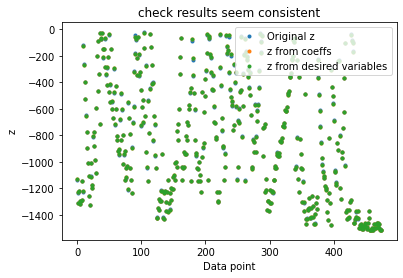

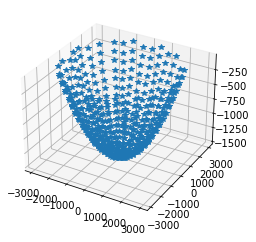

BEST FIT PARAMETERS ARE: 
 a:  0.00016670445477401385 
 z0:  -1512.8772100367896 
 x0:  -1.3604886221979806 
 y0:  58.221476081578544


In [4]:
#read in data
num_coeffs = 4

data = np.genfromtxt('dish_zenith.txt') #(x,y,z) in mm
x = data[:, 0] #name individually to make code more readable
y = data[:, 1]
z = data[:, 2]
print(x.shape)


#set up matrix A
A = np.zeros((len(x), num_coeffs))
print(A.shape)
A[:, 0] = 1 #constant term
A[:, 1] = x
A[:, 2] = y
A[:, 3] = x**2 + y**2

#ignore noise for now: c = inv(A^TA)(A^Tz)
lhs = np.dot(A.transpose(), A)
print('shape of lhs is now  ', lhs.shape)
rhs = np.dot(A.transpose(), z)
coeffs = np.dot(np.linalg.inv(lhs), rhs)
print('coefficients are :', coeffs)

#regain the desired variables from the linearized coefficients
a = coeffs[3]
y0 = coeffs[2]/(-2*a)
x0 = coeffs[1]/(-2*a)
z0 = coeffs[0] - a*x0**2 - a*y0**2

#recover z using fit coefficients
z_test = np.dot(A, coeffs)
print(z_test.shape)

#recover z using desired variables
z_test2 = z0 + a*( (x-x0)**2 + (y-y0)**2 )

#sanity check
mpl.figure()
mpl.title('check results seem consistent')
mpl.ylabel('z')
mpl.xlabel('Data point')
mpl.plot(z, '.')
mpl.plot(z_test, '.')
mpl.plot(z_test2, '.')
mpl.legend(['Original z', 'z from coeffs', 'z from desired variables'])
mpl.show()

mpl.figure()
# Axes3D.plot(x, y, z)
ax = mpl.axes(projection='3d')
ax.plot3D(x, y, z, '*')
mpl.show()



print('BEST FIT PARAMETERS ARE: \n a: ', a, '\n z0: ', z0, '\n x0: ', x0, '\n y0: ', y0)

Estimate of noise  3.7683386487847446


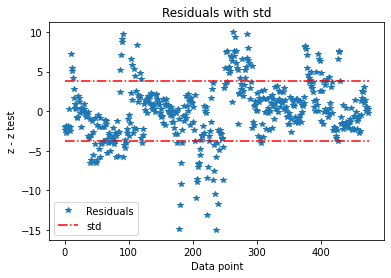

The errors on the coefficients are : [3.12018436e-01 1.25061100e-04 1.19249564e-04 6.45189976e-08]
The focal length f is  1499.6599841252137  mm
The error is  0.5804077581892816  mm


/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


In [5]:
#PART C

#estimate noise on data
std = np.std(z-z_test2)
print('Estimate of noise ', std)

mpl.figure()
mpl.plot(z-z_test2, '*')
mpl.plot([0, len(z)], [std, std], 'r-.')
mpl.plot([0, len(z)], [-1*std, -1*std], 'r-.')
mpl.title('Residuals with std')
mpl.ylabel('z - z test')
mpl.xlabel('Data point')
mpl.legend(['Residuals', 'std'])
mpl.show()

#note that it looks kind of correlated but it's being plotted against data points
#shows no actual correlation to x or y

#focal length
f = 1/(4*a)

#make error matrix incorporating estimate on noise
Ninv = np.eye(A.shape[0])/std**2
sigs = np.diag(np.sqrt( np.linalg.inv(A.T@Ninv@A)))
print('The errors on the coefficients are :', sigs)


#a is the last coefficient, idx 3.
ferr = f*(sigs[3]/a) #fractional error propagation to error on focal length

print('The focal length f is ', f, ' mm')
print('The error is ', ferr, ' mm')

BONUS QUESTION
LINEARIZATION:



(475, 6)
shape of lhs is now   (6, 6)
coefficients are : [-1.51238281e+03  4.19322347e-04 -1.93581475e-02  1.66414734e-04
  1.67074644e-04  1.92159479e-06]
(475,)


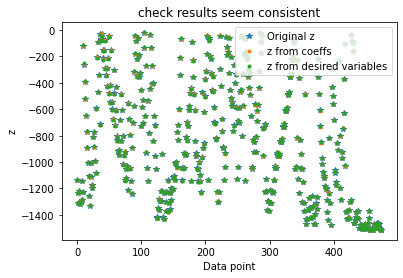

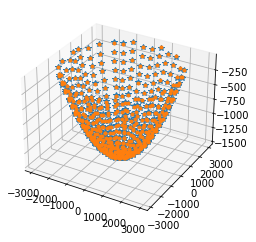

BEST FIT PARAMETERS ARE: 
 a:  0.0001647949717069212 
 b : 0.00016869440596555219 
 z0:  -1512.9439680659118 
 x0:  -1.594399115585026 
 y0:  57.941800246110695 
 theta:  0.7003728299943052


In [6]:
#BONUS QUESTION
#ALL NEW linearization that was a little painful
#z = c1 + c2*x + c3*y + c4*x**2 + c5*y**2 + c6*x*y

#read in data
num_coeffs = 6

#set up matrix A
A = np.zeros((len(x), num_coeffs))
print(A.shape)
A[:, 0] = 1 #constant term
A[:, 1] = x
A[:, 2] = y
A[:, 3] = x**2
A[:, 4] = y**2
A[:, 5] = x*y


#ignore noise for now: c = inv(A^TA)(A^Tz)
#noise from last model might be due to it being noncircular, which is what we're trying to determine here
lhs = np.dot(A.transpose(), A)
print('shape of lhs is now  ', lhs.shape)
rhs = np.dot(A.transpose(), z)
coeffs = np.dot(np.linalg.inv(lhs), rhs)
print('coefficients are :', coeffs)

alpha = coeffs[3]
gamma = coeffs[4]
beta = coeffs[5]

#regain the desired variables from the linearized coefficients
#some functions to help out because it gets hairy.
def get_theta(alpha, beta, gamma):
    return 1/2*np.arctan(2*beta/(gamma-alpha))
def get_b(alpha, gamma, theta):
    return (gamma - alpha*np.sin(theta)**2/np.cos(theta)**2)/(np.cos(theta)**2-np.sin(theta)**4/np.cos(theta)**2)
def get_b_2(alpha, gamma, theta):
    return 1/2*(alpha+gamma - (alpha-gamma)/(np.cos(2*theta)))
def get_a(alpha, gamma, b):
    return alpha + gamma - b
def get_a_2(alpha, gamma, theta):
    return 1/2*( (alpha-gamma)/np.cos(2*theta) + alpha + gamma)

# theta = np.arctan(2*coeffs[5]/(coeffs[4]-coeffs[3]))
theta = get_theta(alpha, beta, gamma)

# b = (coeffs[4] - (coeffs[3]*np.sin(theta)**2/np.cos(theta)**2))/(np.cos(theta)**2 - np.sin(theta)**4/np.cos(theta)**2)
# b = get_b(alpha, gamma, theta) #confirmed they are the same. second method preferred.
b = get_b_2(alpha, gamma, theta)
# print(b-b2)

# a = coeffs[4] + coeffs[3] - b
# a = get_a(alpha, gamma, b) #confirmed the two methods result in the same output. second method preferred
a = get_a_2(alpha, gamma, theta)
# print(a - a2)

x0 = (coeffs[2] - 2*gamma/beta*coeffs[1])/(4*gamma*alpha/beta - beta)
y0 = -(coeffs[1] + 2*x0*alpha)/beta
z0 = coeffs[0] - coeffs[3]*x0**2 - coeffs[5]*x0*y0 - coeffs[4]*y0**2

#recover z using fit coefficients
z_test = np.dot(A, coeffs)
print(z_test.shape)

#recover z using desired variables
# z_test2 = z0 + a*( (x-x0)**2 + (y-y0)**2 )
z_test2 = z0 + a*(np.cos(theta)*(x-x0) - np.sin(theta)*(y-y0))**2 + b*(np.sin(theta)*(x-x0) + np.cos(theta)*(y-y0))**2

#sanity check
mpl.figure()
mpl.title('check results seem consistent')
mpl.ylabel('z')
mpl.xlabel('Data point')
mpl.plot(z, '*')
mpl.plot(z_test, '.')
mpl.plot(z_test2, '.')
mpl.legend(['Original z', 'z from coeffs', 'z from desired variables'])
mpl.show()

mpl.figure()
# Axes3D.plot(x, y, z)
ax = mpl.axes(projection='3d')
ax.plot3D(x, y, z, '*')
ax.plot3D(x, y, z_test2, '.')
mpl.show()



print('BEST FIT PARAMETERS ARE: \n a: ', a, '\n b :', b, '\n z0: ', z0, '\n x0: ', x0, '\n y0: ', y0, '\n theta: ', theta)

Estimate of noise  1.6789523553929753


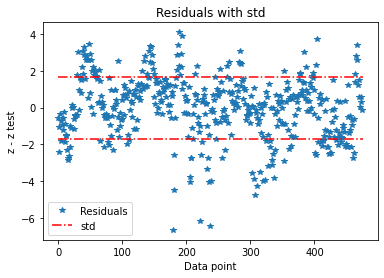

focal lengths are  1517.0365783041684 1481.9697106675287
The errors on the coefficients are : [1.39026810e-01 5.57384669e-05 5.31446986e-05 3.67337852e-08
 3.56824351e-08 4.65122056e-08]
approx error on theta is :  0.022345823705087753
approx error on b is :  1.156342962776465e-06
approx error on a is :  1.1696853830489551e-06
The focal length a : 1517.0365783041684  mm plus minus  10.767655668212736  mm
The focal length b : 1481.9697106675287  mm plus minus  10.15839995505367  mm


/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


In [16]:
#PART C

#estimate noise on data
std = np.std(z-z_test)
print('Estimate of noise ', std)

mpl.figure()
mpl.plot(z-z_test, '*')
mpl.plot([0, len(z)], [std, std], 'r-.')
mpl.plot([0, len(z)], [-1*std, -1*std], 'r-.')
mpl.title('Residuals with std')
mpl.ylabel('z - z test')
mpl.xlabel('Data point')
mpl.legend(['Residuals', 'std'])
mpl.show()

#note that it looks kind of correlated but it's being plotted against data points
#shows no actual correlation to x or y

#focal length
fa = 1/(4*a)
fb = 1/(4*b)

print('focal lengths are ', fa, fb)

#make error matrix incorporating estimate on noise
Ninv = np.eye(A.shape[0])/std**2
sigs = np.diag(np.sqrt( np.linalg.inv(A.T@Ninv@A)))
print('The errors on the coefficients are :', sigs)
dalpha = sigs[3]
dgamma = sigs[4]
dbeta = sigs[5]

#make tangent argument large: beta, alpha up, gamma down
theta_max = get_theta(alpha+dalpha, beta+dbeta, gamma-dgamma)
theta_min = get_theta(alpha-dalpha, beta-dbeta, gamma+dgamma)
dtheta = theta_max - theta_min
print('approx error on theta is : ', dtheta)

#make b large: alpha and gamma both go up (alpha contributes mroe than it takes away)
#also theta goes up for small theta as it shrinks negative term
b_max = get_b_2(alpha+dalpha, gamma+dgamma, theta+dtheta)
b_min = get_b_2(alpha-dalpha, gamma-dgamma, theta-dtheta)
db = b_max - b_min
print('approx error on b is : ', db)

#make a large: alpha and gamma both go up (gamma contributes mroe than it takes away)
#also theta goes down for small theta as it shrinks positive term
a_max = get_a_2(alpha+dalpha, gamma+dgamma, theta-dtheta)
a_min = get_a_2(alpha-dalpha, gamma-dgamma, theta+dtheta)
da = a_max - a_min
print('approx error on a is : ', da)

#fractional error propagation to error on focal length
faerr = fa*(da/a) 
fberr = fb*(db/b)

print('The focal length a :', fa , ' mm plus minus ', faerr, ' mm')
print('The focal length b :', fb , ' mm plus minus ', fberr, ' mm')

THE DISH IS NOT ROUND. The errors do not overlap, the closest the focal lengths could be is ~1490 to ~1507 mm. SO NOT ROUND; different focal lengths for x and y mean different parabolas in x and y directions, so the outermost rim of the dish will not be a circle.